In [9]:
import pandas as pd
import itertools as itt
import ppinetsim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import networkx as nx
import seaborn as sns

In [38]:
parameters = ppinetsim.Parameters('parameter_settings/params_1.json')

In [39]:
parameters.num_studies

10

In [10]:
node_degrees_observed, num_ppis_observed, _, _ = ppinetsim.run_simulation(parameters, verbose=True)

In [11]:
node_degrees_observed_v, num_ppis_observed_v, _, _ = ppinetsim.run_simulation(parameters, verbose=True)

In [40]:
%%time
likelihood_at_k = ppinetsim.estimate_likelihood(parameters, num_simulations_per_generator=10)

CPU times: user 1min 57s, sys: 6.81 s, total: 2min 4s
Wall time: 2min 5s


Text(0, 0.5, 'Frequency')

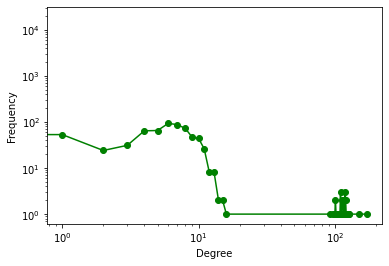

In [12]:
freqs_u = np.asarray(np.unique(node_degrees_observed, return_counts=True), dtype=float)
freqs_v = np.asarray(np.unique(node_degrees_observed_v, return_counts=True), dtype=float)
plt.loglog(freqs_u[0,],freqs_u[1,],'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [8]:


wasserstein_distance(freqs_u[0,], freqs_v[0,], freqs_u[1,], freqs_v[1,])

0.014199999999999768

In [15]:
filename = 'ppinetsim/data/AP-MS/1328865.csv'
adj_sampled_study = pd.read_csv(filename, index_col=0)

In [41]:
likelihood_at_k['k'] = likelihood_at_k.index

In [42]:
data = likelihood_at_k.melt(value_vars=['erdos-renyi', 'barabasi-albert'], id_vars=['k'],
                     var_name='generator', value_name='likelihood')

In [26]:
data

,k,generator,likelihood
0,1,erdos-renyi,1.000000
1,2,erdos-renyi,0.500000
2,3,erdos-renyi,0.666667
3,4,erdos-renyi,0.750000
4,5,erdos-renyi,0.800000
5,6,erdos-renyi,0.666667
6,7,erdos-renyi,0.571429
7,8,erdos-renyi,0.500000
8,9,erdos-renyi,0.444444
9,10,erdos-renyi,0.500000


In [18]:
edge_list = []
for edge in itt.product(adj_sampled_study.index, adj_sampled_study.columns):
    if adj_sampled_study.loc[edge]:
        edge_list.append(edge)

In [21]:
observed_network = nx.Graph()
observed_network.add_edges_from(edge_list)

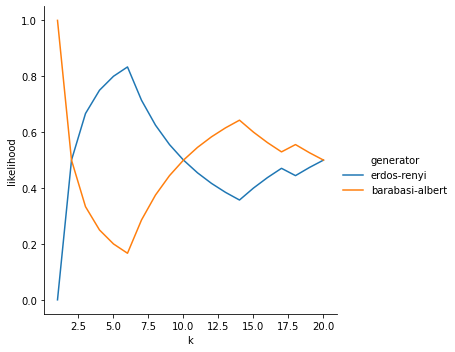

In [43]:
fig = sns.relplot(data=data, x='k', y='likelihood', hue='generator', kind='line')

In [37]:
fig.savefig('bayesian_inference.pdf')